In [1]:
# !pip install --upgrade keras
# !pip install --user --upgrade tensorflow

# Creating the CNN

## Importing the Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import visualkeras
import random
import numpy as np
import time
import keras
import itertools

from graphviz import Digraph
from PIL import ImageFont

from keras import layers

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications import EfficientNetB0

from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


## Normalizing the Data & Seperating the Datasets

In [4]:
train_images = train_images
test_images = test_images

In [5]:
#amount of training images, their Height, Width and Channels (32 pixels high, 32 width, 3 channels)
print(train_images.shape)
#now the amount of test images
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Verifying the Data

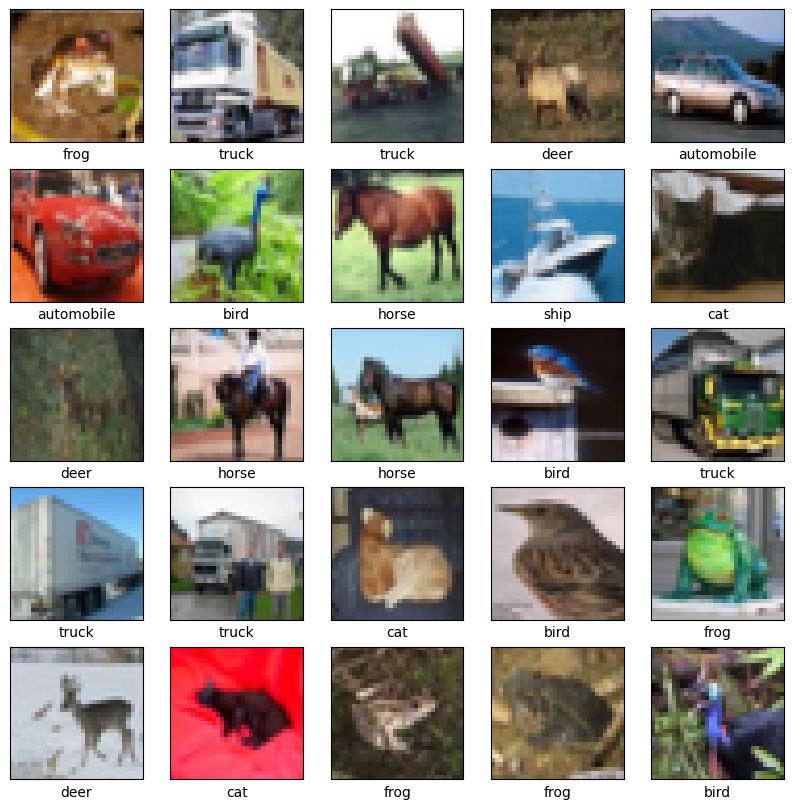

In [6]:
#displays the first 25 images from the training data, as well as their class name

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Compiling and Training the Model

In [7]:
IMG_SIZE = 32
NUM_CLASSES = 10

def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = layers.Resizing(224, 224)(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=inputs, weights="imagenet")


    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [8]:
# One-hot encode the labels
train_labels = to_categorical(train_labels, NUM_CLASSES)
test_labels = to_categorical(test_labels, NUM_CLASSES)

# Start the stopwatch for how long the training will take
training_start = time.time()  # for stopwatch

# Build the model
model = build_model(num_classes=NUM_CLASSES)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

# End the stopwatch and display the training time
training_end = time.time()
training_took = training_end - training_start
print("Training took {:.2f} minutes".format(training_took / 60))


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 606s 323ms/step - accuracy: 0.5113 - loss: 1.5668 - val_accuracy: 0.6801 - val_loss: 1.0481
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 458s 293ms/step - accuracy: 0.7369 - loss: 0.7878 - val_accuracy: 0.7841 - val_loss: 0.6682
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 473s 303ms/step - accuracy: 0.7795 - loss: 0.6629 - val_accuracy: 0.7297 - val_loss: 1.0998
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 469s 300ms/step - accuracy: 0.8054 - loss: 0.5960 - val_accuracy: 0.8123 - val_loss: 0.5584
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 470s 301ms/step - accuracy: 0.8368 - loss: 0.4937 - val_accuracy: 0.8164 - val_loss: 0.5321
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 494s 296ms/step - accuracy: 0.8470 - loss: 0.4577 - val_accuracy: 0.8159 - val_loss: 0.5384
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 490s 314ms/step - accuracy: 0.8709 - loss: 0.3831 - val_accuracy: 0.8162 - val_loss: 0.6625
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 475s 304ms/step - ac

## Plotting the results

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.8338 - loss: 0.6575


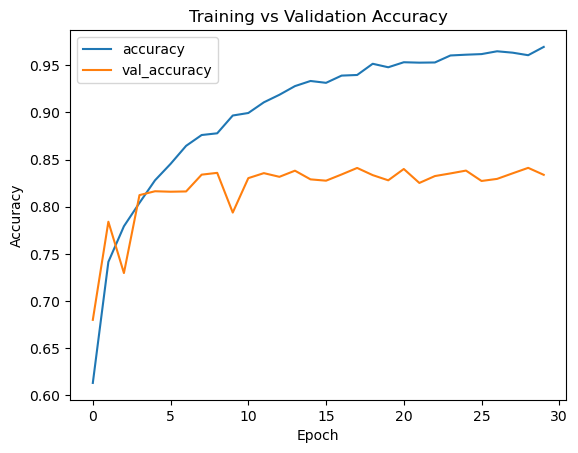

In [9]:
# using matplot lib to plot the results from the results gathered from the first compile. 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.title('Training vs Validation Accuracy')

# we're evaluating the training accuracy and test accuracy compared to epochs using the test data (aka the validation data)

test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.8338 - loss: 0.6575


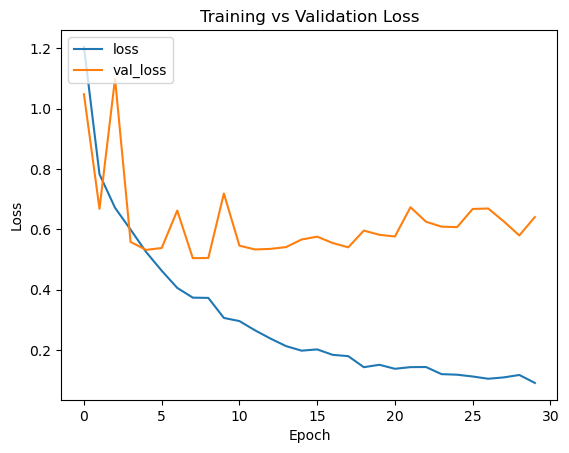

In [10]:
# using matplot lib to plot the results from the results gathered from the first compile. 

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.title('Training vs Validation Loss')

# we're evaluating the training and test loss compared to epochs using the test data (aka the validation data)

test_loss, test_acc = model.evaluate(test_images,  test_labels)

### Visualising the Architecture

C:\Users\callu\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


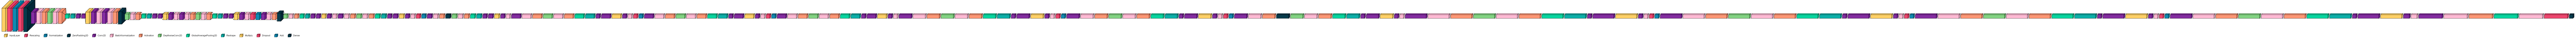

In [11]:
#Visual Keras is a tool that allows for the visualisation of the network architecture

visualkeras.layered_view(model) # displays the model

# displays legend for the network architecture and the font used for the legeld
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font)

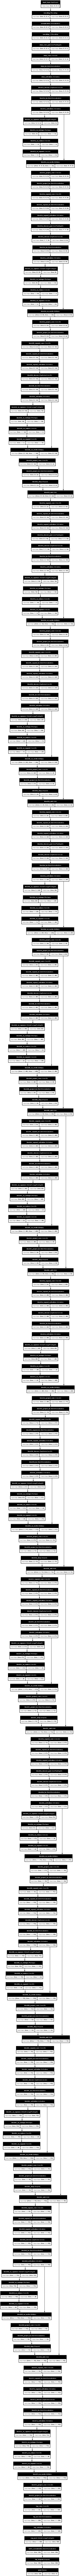

In [12]:
# using Graphviz to show the model created and saving the model to a .png file

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Data Augmentation

In [13]:
#Adding data augmentation to gather more accurate results
# this sets the image size to 32x32 and then rotates, flips and changes the images to get better accuracy

training_start = time.time() # for stopwatch


batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(train_images, train_labels, batch_size)
steps_per_epoch = train_images.shape[0] // batch_size

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

r = model.fit(train_generator, validation_data=(test_images, test_labels),
              steps_per_epoch=steps_per_epoch, epochs=30)

#ends the stopwatch and displays the training time
training_end = time.time()
training_took = training_end -training_start
print("Training took {:.2f} minutes".format(training_took / 60))

model.save('DL_CNN_Model.h5')

C:\Users\callu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1011s 618ms/step - accuracy: 0.8312 - loss: 0.5237 - val_accuracy: 0.8341 - val_loss: 0.4937
Epoch 2/30
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 12:10 468ms/step - accuracy: 0.7500 - loss: 0.7839

C:\Users\callu\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7500 - loss: 0.7839 - val_accuracy: 0.8347 - val_loss: 0.4921
Epoch 3/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 785s 503ms/step - accuracy: 0.8607 - loss: 0.4137 - val_accuracy: 0.8443 - val_loss: 0.4748
Epoch 4/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8438 - loss: 0.3622 - val_accuracy: 0.8451 - val_loss: 0.4730
Epoch 5/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 777s 497ms/step - accuracy: 0.8650 - loss: 0.3987 - val_accuracy: 0.8551 - val_loss: 0.4400
Epoch 6/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8125 - loss: 0.5402 - val_accuracy: 0.8549 - val_loss: 0.4400
Epoch 7/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 795s 509ms/step - accuracy: 0.8732 - loss: 0.3715 - val_accuracy: 0.8457 - val_loss: 0.4567
Epoch 8/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.9375 - loss: 0.1745 - val_accuracy: 0.8458 - val_loss: 0.4566
Epoch 9/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 834s 534ms/step - accuracy: 0.8781 - lo

Training took 208.28 minutes


## Plotting Results After Data Augmentation

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.8524 - loss: 0.4643


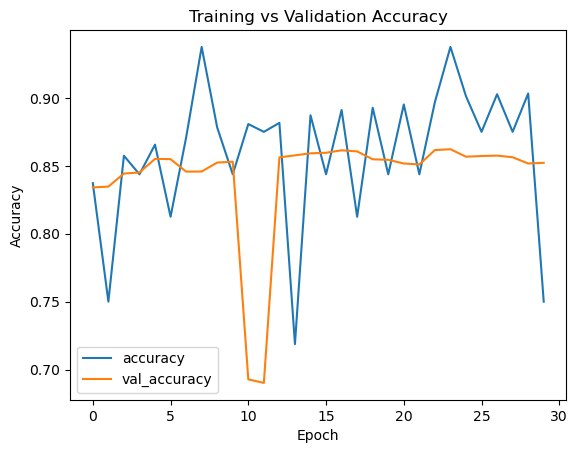

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Training vs Validation Accuracy')
 
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step - accuracy: 0.8524 - loss: 0.4643


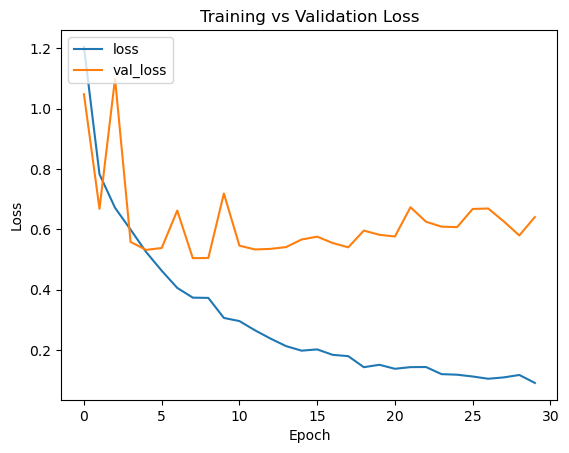

In [15]:
# using matplot lib to plot the results from the results gathered from the first compile. 

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.title('Training vs Validation Loss')

# we're evaluating the training and test loss compared to epochs using the test data (aka the validation data)

test_loss, test_acc = model.evaluate(test_images,  test_labels)

## Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Original label is dog and predicted label is dog


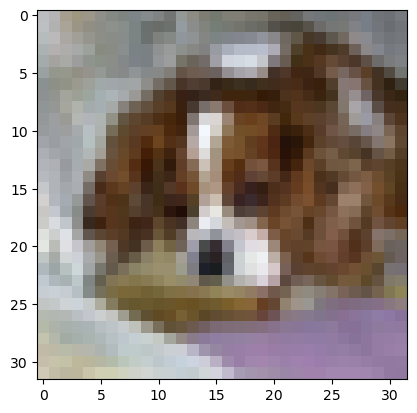

In [16]:
# label mapping
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()

# select a random image from our test dataset
image_number = random.randint(0, 10000)

# display the image
plt.imshow(test_images[image_number])

# load the image in an array
n = np.array(test_images[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass the image through the model to predict the label
predicted_label = labels[model.predict(p).argmax()]

# load the original label (convert from one-hot encoded to a scalar)
original_label = labels[test_labels[image_number].argmax()]

# display the result
print(f"Original label is {original_label} and predicted label is {predicted_label}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step


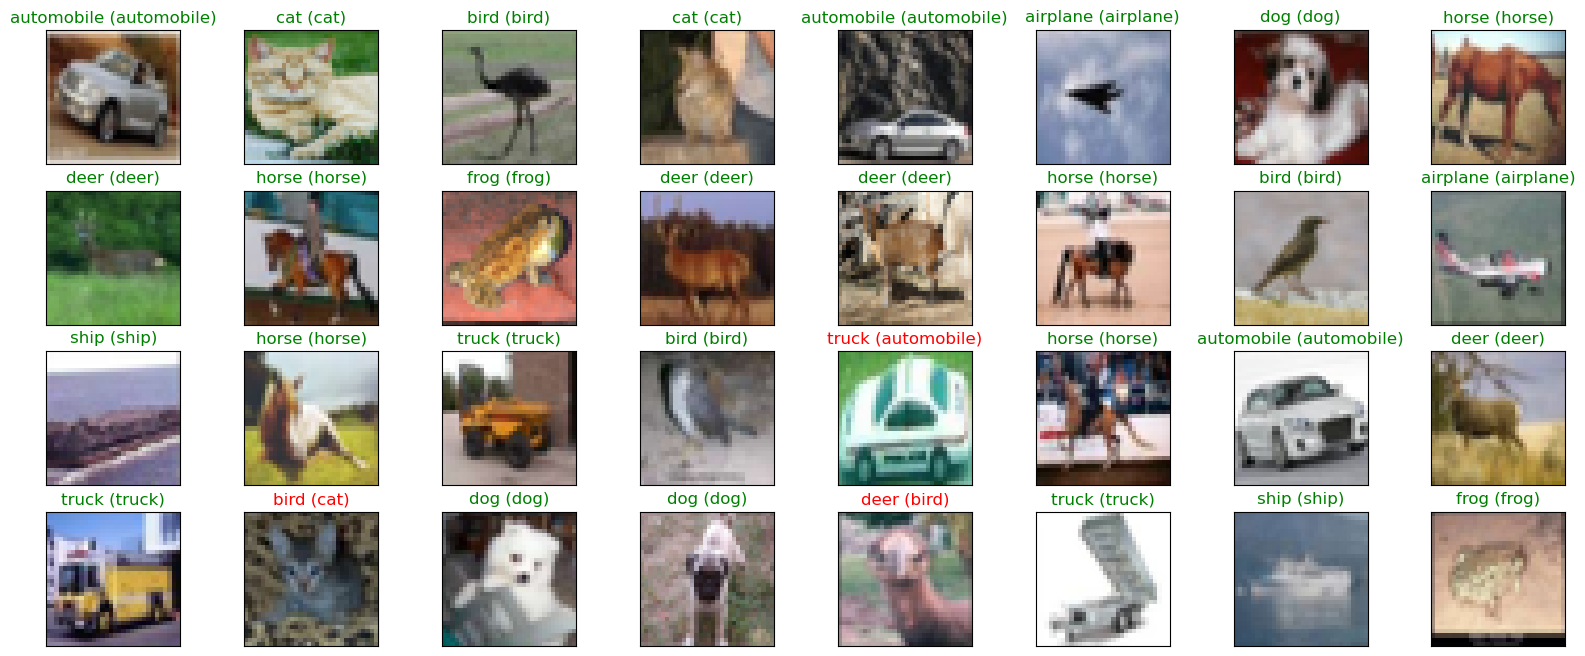

In [17]:
# get predictions on the test set
prediction = model.predict(test_images)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# plot a random sample of test images, their predicted labels, and ground truth


fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]))
    pred_idx = np.argmax(prediction[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

## Statistics

### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step
Confusion matrix, without normalization
[[846  17  30  12   5   1  18   5  47  19]
 [  7 937   1   3   0   2  10   0  11  29]
 [ 25   1 829  23  23  19  66   9   2   3]
 [ 11  10  41 685  18  97 111   8  11   8]
 [  8   2  38  36 811  26  63  12   4   0]
 [  7   3  25 129  19 751  43  16   4   3]
 [  1   1  10  15   0   5 967   0   1   0]
 [  5   3  12  33  30  33  14 861   2   7]
 [ 23   9   3   3   3   1  10   1 942   5]
 [ 14  60   4   5   0   0  10   2  12 893]]


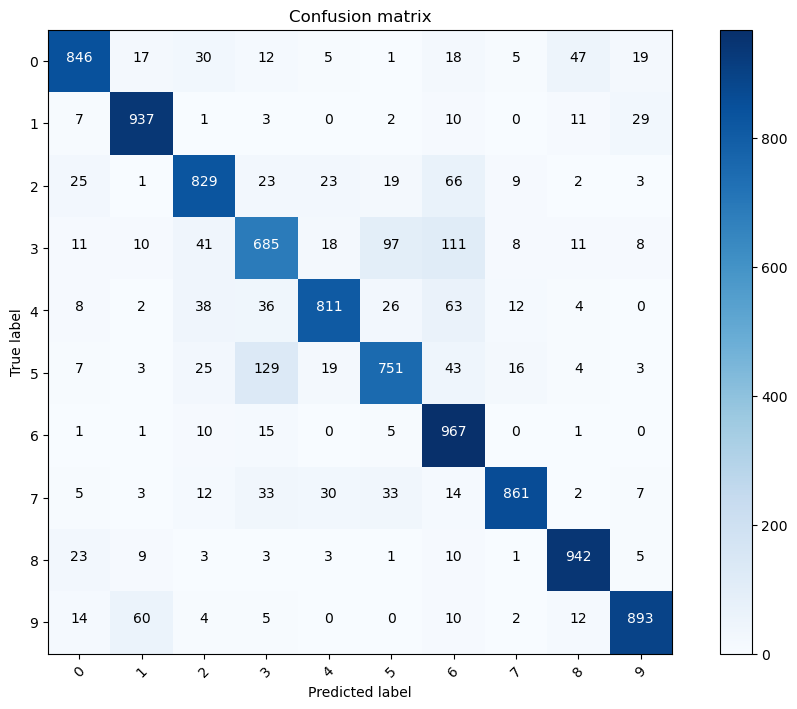

In [18]:
# setting the default size
plt.rcParams['figure.figsize'] = [10,7]

# defining the function for the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize rows (true label axis)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
  # print the matrix to console
    print(cm)

  # Create tick marks for each class 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    # displays the confusion matrix as an image
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


  # adds the text annotations to each cell
    value_format = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], value_format),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  # adjusts the layout to fill all the lables
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#generates the prediction
test_matrix = model.predict(test_images).argmax(axis=1)
true_labels = test_labels.argmax(axis=1)
cm = confusion_matrix(true_labels, test_matrix)

#plots the confusion matrix
plot_confusion_matrix(cm, list(range(10)))

### F1 - Score

In [19]:
# Convert one-hot encoded labels to class indices
true_labels = test_labels.argmax(axis=1)

# Now compute the F1 score with proper format
f1 = f1_score(true_labels, test_matrix, average='macro')
print(f"F1 Score (macro): {f1:.4f}")

F1 Score (macro): 0.8518


## Nao Robot

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


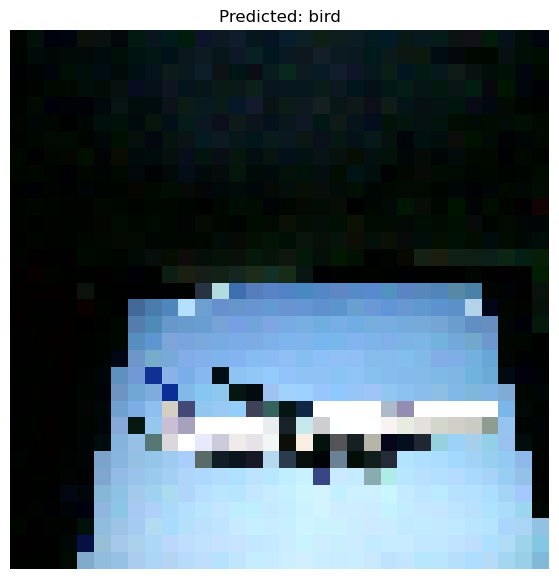

In [20]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model('DL_CNN_Model.h5')

# CIFAR-10 class names
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']

# Path to folder containing images
image_folder = 'C:/Users/callu/Documents/MsC Robotics and AI/Deep Learning/Test'

# Loop through each image in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_folder, filename)

        # Load and preprocess image
        image = load_img(image_path, target_size=(32, 32))
        image_array = img_to_array(image)
        image_array = image_array / 255.0  # Normalize
        image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

        # Predict class
        predictions = model.predict(image_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        class_name = labels[predicted_class]

        # Show image with label
        plt.imshow(image)
        plt.title(f'Predicted: {class_name}')
        plt.axis('off')
        plt.show()
